In [1]:
import numpy as np
from towhee import pipe, ops
import hnswlib

/home/dseg/miniconda3/envs/fm/lib/python3.11/site-packages/pydantic/_internal/_fields.py:149: UserWarning: Field "model_name" has conflict with protected namespace "model_".

You may be able to resolve this warning by setting `model_config['protected_namespaces'] = ()`.
  warnings.warn(


In [2]:
p = (
    pipe.input('path')
        .map('path', 'img', ops.image_decode.cv2())
        .map('img', 'embedding', ops.image_text_embedding.clip(model_name="../../vector_database/project/clip-vit-base-patch32", modality='image'))
        .map('embedding', 'embedding', lambda x:x/np.linalg.norm(x))  # 归一化操作
        .output('embedding')
)

/home/dseg/miniconda3/envs/fm/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
dim = 512

p1 = hnswlib.Index(space = 'l2', dim = dim)
p1.load_index("output/dataset/oxbuild/17126_pic.bin")
p1.set_ef(20)

In [6]:
import matplotlib.pyplot as plt
import matplotlib.image as img 

In [7]:
import pandas as pd
img_map = pd.read_csv('output/dataset/oxbuild/output.csv')
image_path = 'dataset/oxbuild/images/'

[[   8   80 4705 3099 3989  659  130   81  103  120]]


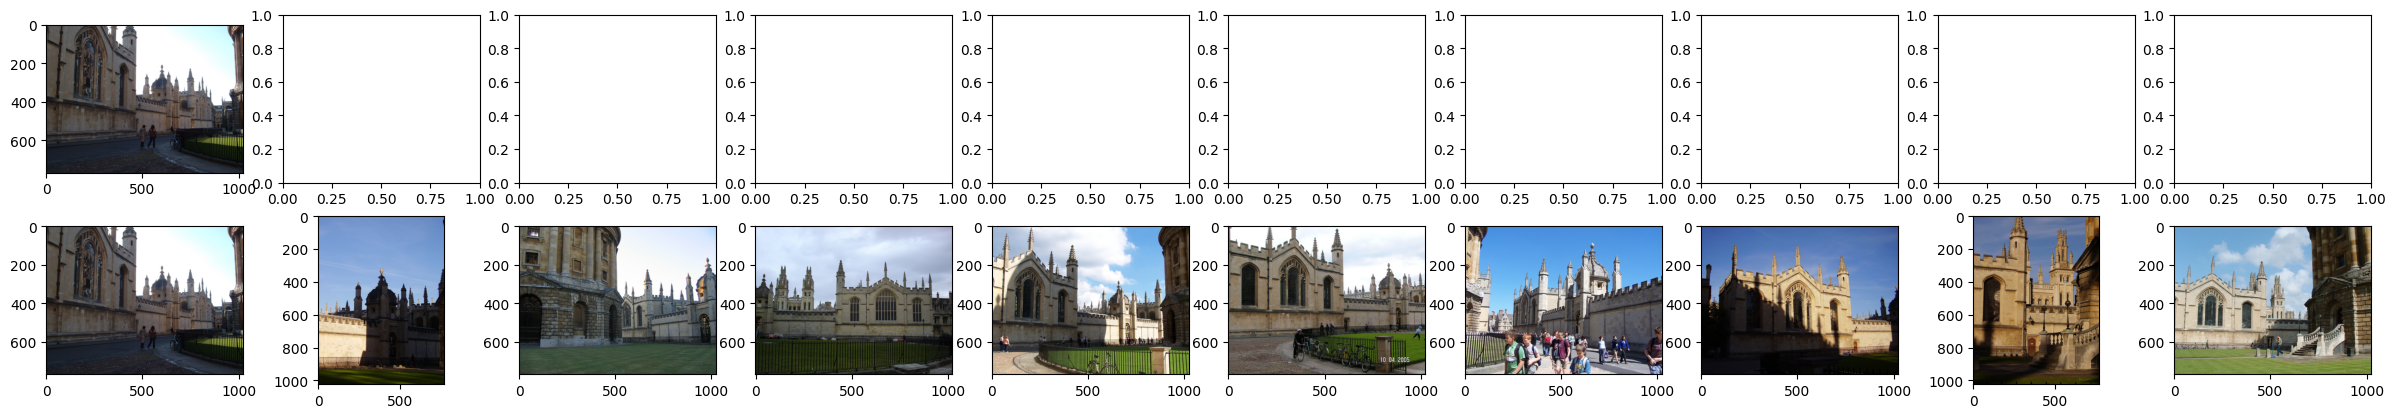

In [11]:
k = 10
fig, axes = plt.subplots(nrows=2, ncols=k)
fig.set_figwidth(30)
target_image = 'dataset/oxbuild/images/all_souls_000010.jpg'
axes[0, 0].imshow(img.imread(target_image))

res = p(target_image).get()
vec = res[0]
labels, distances = p1.knn_query(vec, k=k)
print(labels)
for (idx, i) in enumerate(labels.squeeze()):
    axes[1, idx].imshow(img.imread(image_path + img_map.loc[i, 'File']))
